# Import

In [1]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import researchpy as rp
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from scipy.stats import skew 
from sklearn.model_selection import train_test_split
# machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import svm
# computational time
import time

In [2]:
#importing the csv dataset
train = pd.read_csv('train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Dealing with null data

FROM EDA:

LotFrontage /number of null data: 259

MasVnrArea /number of null data: 8

Electrical /number of null data: 1

GarageYrBlt /number of null data: 81


For feature with too many missing values, remove this feature entirely. 
- Set treshold to be 10% of all data points

For feature with only a few missing values, remove that data point.

In [3]:
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train.dropna(subset=drop, inplace=True)

train.head()

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


Id  MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
0   1          60       RL     8450   Pave   NaN      Reg         Lvl   
1   2          20       RL     9600   Pave   NaN      Reg         Lvl   
2   3          60       RL    11250   Pave   NaN      IR1         Lvl   
3   4          70       RL     9550   Pave   NaN      IR1         Lvl   
4   5          60       RL    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0    AllPub    Inside  ...        0    NaN   NaN         NaN       0      2   
1    AllPub       FR2  ...        0    NaN   NaN         NaN       0      5   
2    AllPub    Inside  ...        0    NaN   NaN         NaN       0      9   
3    AllPub    Corner  ...        0    NaN   NaN         NaN       0      2   
4    AllPub       FR2  ...        0    NaN   NaN         NaN       0     12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal     208500  
1    2007        WD         Normal     181500  
2    2008        WD         Normal     223500  
3    2006        WD        Abnorml     140000  
4    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
print('Number of columns:', len(train.columns))
print('Number of data:', len(train))

Number of columns: 80
Number of data: 1370


## Dealing with highly skewed categorical features

As identifited from data exploration, we removed categorical variables with one category of data occuping >= 90% of data. 

In [5]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
#skewness of categorical variables
max_percent = []
catogorical_skewed=[]
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))
#highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90:
        catogorical_skewed.append(i)
        print (i,"/ratio of the dominant category = ", rp.summary_cat(train[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 15
Street /ratio of the dominant category =  0.9964
LandContour /ratio of the dominant category =  0.9015000000000001
Utilities /ratio of the dominant category =  0.9993000000000001
LandSlope /ratio of the dominant category =  0.9467
Condition2 /ratio of the dominant category =  0.9898
RoofMatl /ratio of the dominant category =  0.9818000000000001
BsmtCond /ratio of the dominant category =  0.9246
Heating /ratio of the dominant category =  0.981
CentralAir /ratio of the dominant category =  0.9495999999999999
Electrical /ratio of the dominant category =  0.9226000000000001
Functional /ratio of the dominant category =  0.9336
GarageQual /ratio of the dominant category =  0.9504
GarageCond /ratio of the dominant category =  0.9612999999999999
PavedDrive /ratio of the dominant category =  0.9372
MiscFeature /ratio of the dominant category =  0.9216


In [6]:
for i in catogorical_skewed:
    train.drop(columns=[i], inplace=True)

In [7]:
for i in catogorical_skewed:
    categorical.remove(i)
#skewness of categorical variables
max_percent = []
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
        max_percent.append(rp.summary_cat(train[i])["Percent"].max())
print ("The number of variables with one category of data which occupies >= 90% of data =", len(max_percent))
#highly skewed categorical variables
for i in categorical: 
    if rp.summary_cat(train[i])["Percent"].max() >= 90: 
         print (i,"/ratio of the dominant category = ", rp.summary_cat(train[i])["Percent"].max()/100)

The number of variables with one category of data which occupies >= 90% of data = 0


# One Hot Encoding

In [8]:
train = pd.get_dummies(train, columns= categorical, prefix= categorical)
train.head()

Id  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0   1     8450       2003          2003       196.0         706           0   
1   2     9600       1976          1976         0.0         978           0   
2   3    11250       2001          2002       162.0         486           0   
3   4     9550       1915          1970         0.0         216           0   
4   5    14260       2000          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLw  SaleType_New  \
0        150          856       856  ...               0             0   
1        284         1262      1262  ...               0             0   
2        434          920       920  ...               0             0   
3        540          756       961  ...               0             0   
4        490         1145      1145  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   
1             0            1                      0                      0   
2             0            1                      0                      0   
3             0            1                      1                      0   
4             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 248 columns]

In [9]:
print('Shape:', train.shape)
print('Dtypes:\n', train.dtypes)

Shape: (1370, 248)
Dtypes:
 Id                         int64
LotArea                    int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 248, dtype: object


## Features

Create a feature dataset that does not consist of Id and SalePrice (label: value to be predicted)


In [10]:
features = train.copy()
features.drop(['Id', 'SalePrice'], axis=1, inplace=True)

labels = train['SalePrice']

In [11]:
train_X, test_X, train_Y, test_Y = train_test_split(features,labels,test_size=0.2, random_state=0)

## Pre-processing v1 - Removing outliers with log transformation: Continuous Variables 

Using logarithmic transformation, it may help correct the distribution of variables.

In [12]:
# identifying continuous variables with high skewness
continuous = ['LotArea', 'YearBuilt', 'YearRemodAdd', 
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
array1 = skew(train[continuous])
#the top 15 features which are the most skewed
index1 = array1.argsort()[-15:][::-1]
continuous_skewed=[]
for i in index1:
    print (continuous[i],": skewness = ", array1[i])
    if array1[i]>=1:
        continuous_skewed.append(continuous[i])

MiscVal : skewness =  24.732979451706033
PoolArea : skewness =  14.342881566937836
LotArea : skewness =  12.025446327344339
LowQualFinSF : skewness =  10.66505349858299
3SsnPorch : skewness =  9.96262046395852
KitchenAbvGr : skewness =  5.129053439295553
BsmtFinSF2 : skewness =  4.174330005566947
ScreenPorch : skewness =  3.967379533802487
BsmtHalfBath : skewness =  3.89811918894981
EnclosedPorch : skewness =  3.214887613130617
MasVnrArea : skewness =  2.588332838278803
OpenPorchSF : skewness =  2.2638025759950504
BsmtFinSF1 : skewness =  1.6941364533315026
TotalBsmtSF : skewness =  1.6330286577439608
WoodDeckSF : skewness =  1.5027101898713007


In [13]:
#applying log transformation for selected variables
train_out=train.copy()
for i in continuous_skewed:
    train_out[i] = train_out[i].map(lambda l: np.log(l) if l > 0 else 0)

In [14]:
#recalculating skewness of continuous variables
array2 = skew(train_out[continuous])
#the top 10 features which are the most skewed
index2 = array2.argsort()[-15:][::-1]
continuous_skewed=[]
for i in index2: 
    print (continuous[i],": skewness = ", array2[i])
    if array2[i] >= 1:
        continuous_skewed.append(continuous[i])

BsmtHalfBath : skewness =  36.97297297297236
PoolArea : skewness =  13.892471985364587
LowQualFinSF : skewness =  8.537169018827495
3SsnPorch : skewness =  7.475352552864676
MiscVal : skewness =  5.151007848096852
KitchenAbvGr : skewness =  4.960618997125171
ScreenPorch : skewness =  3.0205800205812574
BsmtFinSF2 : skewness =  2.453380237081663
EnclosedPorch : skewness =  2.203145749719571
GrLivArea : skewness =  1.4168971139325073
1stFlrSF : skewness =  1.3857782746124663
BsmtUnfSF : skewness =  0.9266242711949279
GarageArea : skewness =  0.8114489269622572
2ndFlrSF : skewness =  0.7879161526110934
TotRmsAbvGrd : skewness =  0.6758238152091317


In [15]:
#revert the log transformation if the skewness increases after log transformation
for i in index2: 
    print (continuous[i],": skewness = ", array1[i],"\t, skewness2 = ", array2[i])
    if array2[i] >= array1[i]:
        train_out[continuous[i]] = train[continuous[i]]

BsmtHalfBath : skewness =  3.89811918894981 	, skewness2 =  36.97297297297236
PoolArea : skewness =  14.342881566937836 	, skewness2 =  13.892471985364587
LowQualFinSF : skewness =  10.66505349858299 	, skewness2 =  8.537169018827495
3SsnPorch : skewness =  9.96262046395852 	, skewness2 =  7.475352552864676
MiscVal : skewness =  24.732979451706033 	, skewness2 =  5.151007848096852
KitchenAbvGr : skewness =  5.129053439295553 	, skewness2 =  4.960618997125171
ScreenPorch : skewness =  3.967379533802487 	, skewness2 =  3.0205800205812574
BsmtFinSF2 : skewness =  4.174330005566947 	, skewness2 =  2.453380237081663
EnclosedPorch : skewness =  3.214887613130617 	, skewness2 =  2.203145749719571
GrLivArea : skewness =  1.4168971139325073 	, skewness2 =  1.4168971139325073
1stFlrSF : skewness =  1.3857782746124663 	, skewness2 =  1.3857782746124663
BsmtUnfSF : skewness =  0.9266242711949279 	, skewness2 =  0.9266242711949279
GarageArea : skewness =  0.8114489269622572 	, skewness2 =  0.811448

In [16]:
#recalculating skewness of continuous variables
array2 = skew(train_out[continuous])
#the top 10 features which are the most skewed
index2 = array2.argsort()[-15:][::-1]
for i in index2: 
    print (continuous[i],": skewness = ", array2[i])

PoolArea : skewness =  13.892471985364587
LowQualFinSF : skewness =  8.537169018827495
3SsnPorch : skewness =  7.475352552864676
MiscVal : skewness =  5.151007848096852
KitchenAbvGr : skewness =  4.960618997125171
BsmtHalfBath : skewness =  3.89811918894981
ScreenPorch : skewness =  3.0205800205812574
BsmtFinSF2 : skewness =  2.453380237081663
EnclosedPorch : skewness =  2.203145749719571
GrLivArea : skewness =  1.4168971139325073
1stFlrSF : skewness =  1.3857782746124663
BsmtUnfSF : skewness =  0.9266242711949279
GarageArea : skewness =  0.8114489269622572
2ndFlrSF : skewness =  0.7879161526110934
TotRmsAbvGrd : skewness =  0.6758238152091317


## Pre-processing v1 - Removing outliers with IQR: Continuous Variables

After doing the log transformation, we selected continuous variables that still gives a skewness value of more than 1. <br> 
We then used the interquartile range (IQR) method to remove the outliers.


In [17]:
print(train_out.shape)
# calculate interquartile range
q25, q75 = train_out[continuous_skewed].quantile(0.25), train_out[continuous_skewed].quantile(0.75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

train_out_2 = train_out[~((train_out>upper)).any(axis=1)]
print(train_out_2.shape)

(1370, 248)
(799, 248)


In [18]:
#calculating skewness of continuous variables
array = skew(train_out_2[continuous])
#the top 3 features which are the most skewed
index = array.argsort()[-3:][::-1]
for i in index: 
    print (continuous[i],": skewness = ", array[i])

BsmtUnfSF : skewness =  0.8134469641710275
GarageArea : skewness =  0.7509952288155002
2ndFlrSF : skewness =  0.6462040969748152


In [19]:
features_liqr = train_out_2.copy()
features_liqr.drop(['Id', 'SalePrice'], axis=1, inplace=True)
labels_liqr = train_out_2['SalePrice']
train_X_liqr, test_X_liqr, train_Y_liqr, test_Y_liqr = train_test_split(features_liqr,labels_liqr,test_size=0.2, random_state=0)

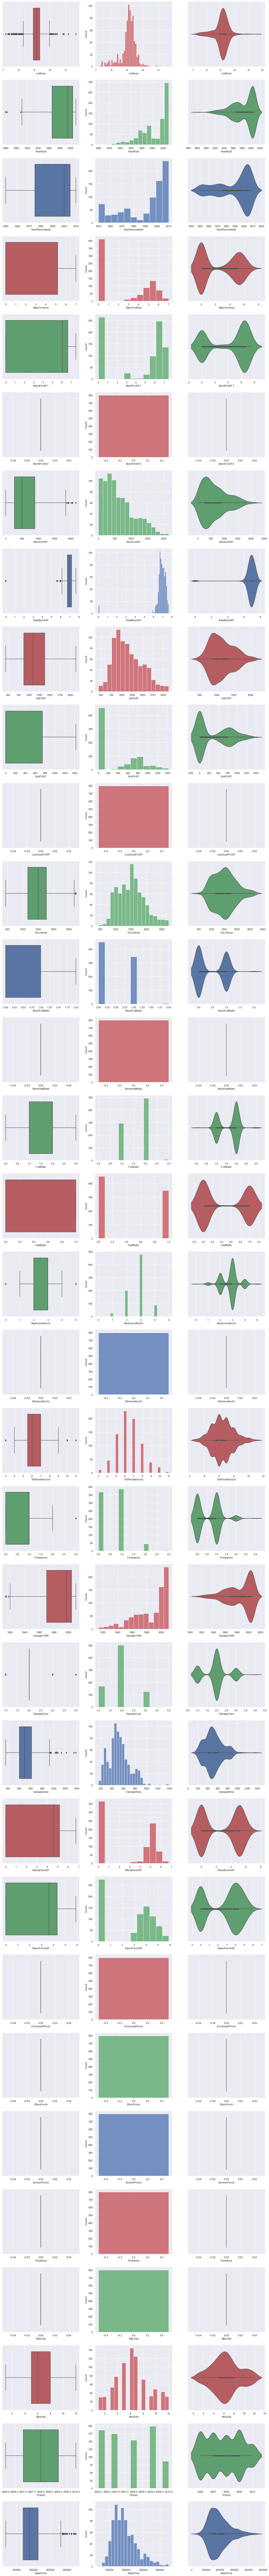

In [20]:
#investigating the skewness of data features (visually)
f, axes = plt.subplots(len(continuous)+1, 3, figsize=(20, 200))
colors = ["r", "g", "b","r","g"]
colors = colors*7

count = 0
for i in continuous+['SalePrice']:
    sb.boxplot(x = train_out_2[i], color = colors[count], ax = axes[count,0])
    sb.histplot(x = train_out_2[i], color = colors[count], ax = axes[count,1])
    sb.violinplot(x = train_out_2[i], color = colors[count], ax = axes[count,2])
    count += 1

## Pre-processing v2 - Applying Normalization (Min-Max scaling)

Transforming values so that they range between 0 and 1.

In [21]:
# data normalization from sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(features)
# transform training data
features_norm = norm.transform(features)


In [22]:
train_X_norm, test_X_norm, train_Y_norm, test_Y_norm = train_test_split(features_norm,labels,test_size=0.2, random_state=0)

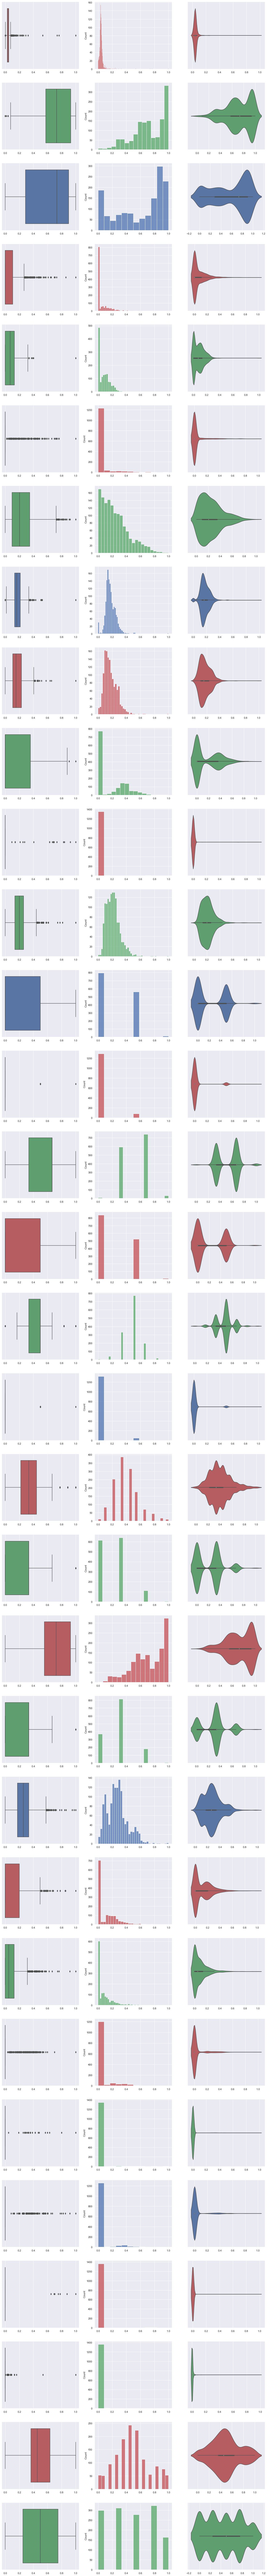

In [23]:
#investigating the skewness of data features (visually)
f, axes = plt.subplots(len(continuous), 3, figsize=(20, 200))
colors = ["r", "g", "b","r","g"]
colors = colors*7
count = 0
for i in continuous:
    col_ind=features.columns.get_indexer([i])[0]
    sb.boxplot(x = features_norm[:,col_ind], color = colors[count], ax = axes[count,0])
    sb.histplot(x = features_norm[:,col_ind], color = colors[count], ax = axes[count,1])
    sb.violinplot(x = features_norm[:,col_ind], color = colors[count], ax = axes[count,2])
    count += 1 

## Pre-processing v3 - Applying Standardization (Z-Score method)

Transforming data into a distribution with a mean of 0 and standard deviation of 1.

In [24]:
# data standardization from sklearn
from sklearn.preprocessing import StandardScaler
features_stan=train.copy()
for i in continuous:
    # fit on training data column
    scale = StandardScaler().fit(train[[i]])
    # transform training data column
    features_stan[i] = scale.transform(features_stan[[i]])
features_stan.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [25]:
train_X_stan, test_X_stan, train_Y_stan, test_Y_stan = train_test_split(features_stan,labels,test_size=0.2, random_state=0)

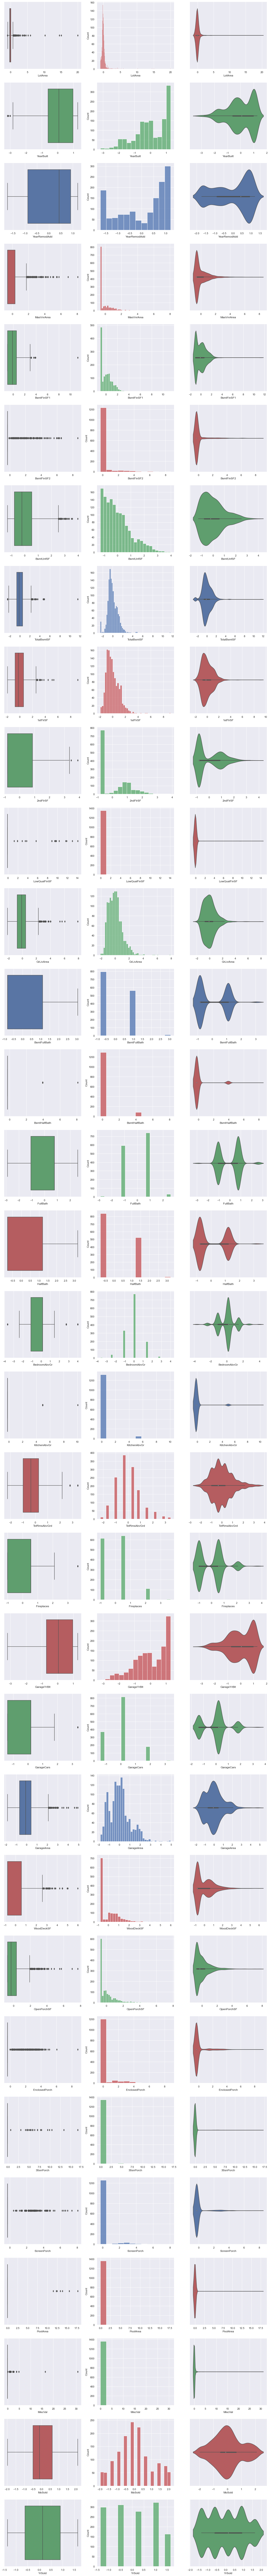

In [26]:
#investigating the skewness of data features (visually)
f, axes = plt.subplots(len(continuous), 3, figsize=(20, 200))
colors = ["r", "g", "b","r","g"]
colors = colors*7
count = 0
for i in continuous:
    sb.boxplot(x = features_stan[i], color = colors[count], ax = axes[count,0])
    sb.histplot(x = features_stan[i], color = colors[count], ax = axes[count,1])
    sb.violinplot(x = features_stan[i], color = colors[count], ax = axes[count,2])
    count += 1 

In [27]:
#calculating skewness of continuous variables
array = skew(features_stan[continuous])
#the top 10 features which are the most skewed
index = array.argsort()[-10:][::-1]
for i in index: 
    print (continuous[i],": skewness = ", array[i])

MiscVal : skewness =  24.73297945170622
PoolArea : skewness =  14.342881566938047
LotArea : skewness =  12.025446327344378
LowQualFinSF : skewness =  10.665053498583756
3SsnPorch : skewness =  9.962620463958894
KitchenAbvGr : skewness =  5.129053439295622
BsmtFinSF2 : skewness =  4.1743300055669375
ScreenPorch : skewness =  3.967379533802451
BsmtHalfBath : skewness =  3.8981191889499778
EnclosedPorch : skewness =  3.2148876131305855


## Pre-processing v4 - combine v1 and v2

In [28]:
features_liqr = train_out_2.copy()
features_liqr.drop(['Id', 'SalePrice'], axis=1, inplace=True)
labels_liqr = train_out_2['SalePrice']
# data normalization from sklearn
# fit scaler on training data
norm = MinMaxScaler().fit(features_liqr)
# transform training data
features_norm = norm.transform(features_liqr)
train_X_liqr_norm, test_X_liqr_norm, train_Y_liqr_norm, test_Y_liqr_norm = train_test_split(features_norm,labels_liqr,test_size=0.2, random_state=0)

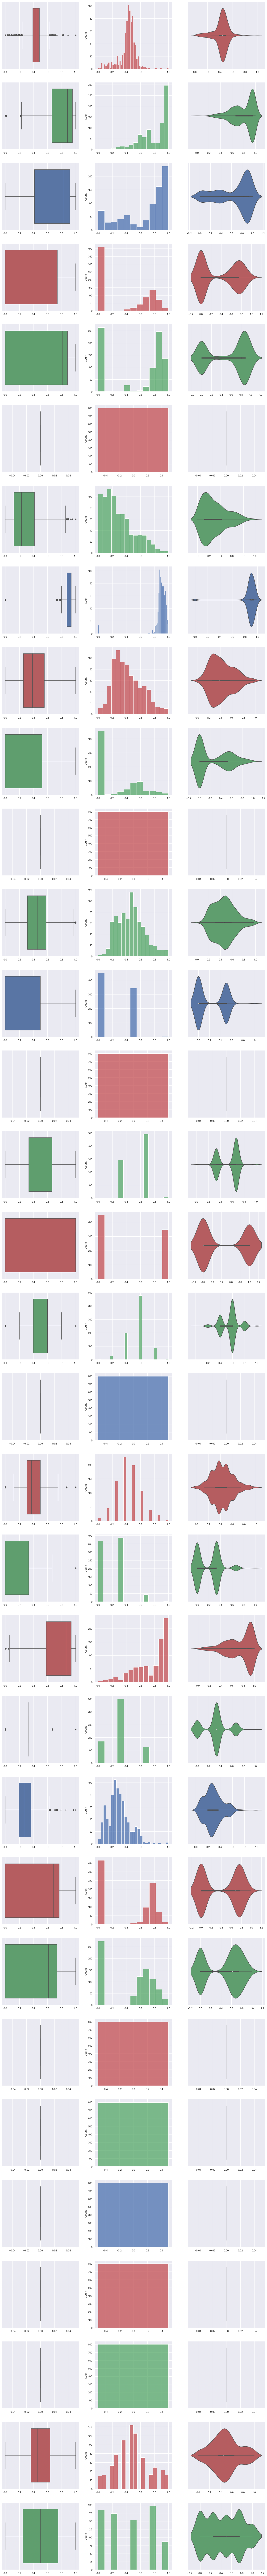

In [29]:
#investigating the skewness of data features (visually)
f, axes = plt.subplots(len(continuous), 3, figsize=(20, 200))
colors = ["r", "g", "b","r","g"]
colors = colors*7
count = 0
for i in continuous:
    col_ind=features.columns.get_indexer([i])[0]
    sb.boxplot(x = features_norm[:,col_ind], color = colors[count], ax = axes[count,0])
    sb.histplot(x = features_norm[:,col_ind], color = colors[count], ax = axes[count,1])
    sb.violinplot(x = features_norm[:,col_ind], color = colors[count], ax = axes[count,2])
    count += 1 

## Pre-processing v5 - combine v1 and v3

In [30]:
# data standardization 
features_liqr_stan=train_out_2.copy()
for i in continuous:
    # fit on training data column
    scale = StandardScaler().fit(train_out_2[[i]])
    # transform training data column
    features_liqr_stan[i] = scale.transform(features_liqr_stan[[i]])
labels_liqr_stan = train_out_2['SalePrice']
features_liqr_stan.drop(['Id', 'SalePrice'], axis=1, inplace=True)

train_X_liqr_stan, test_X_liqr_stan, train_Y_liqr_stan, test_Y_liqr_stan = train_test_split(features_liqr_stan,labels_liqr_stan,test_size=0.2, random_state=0)

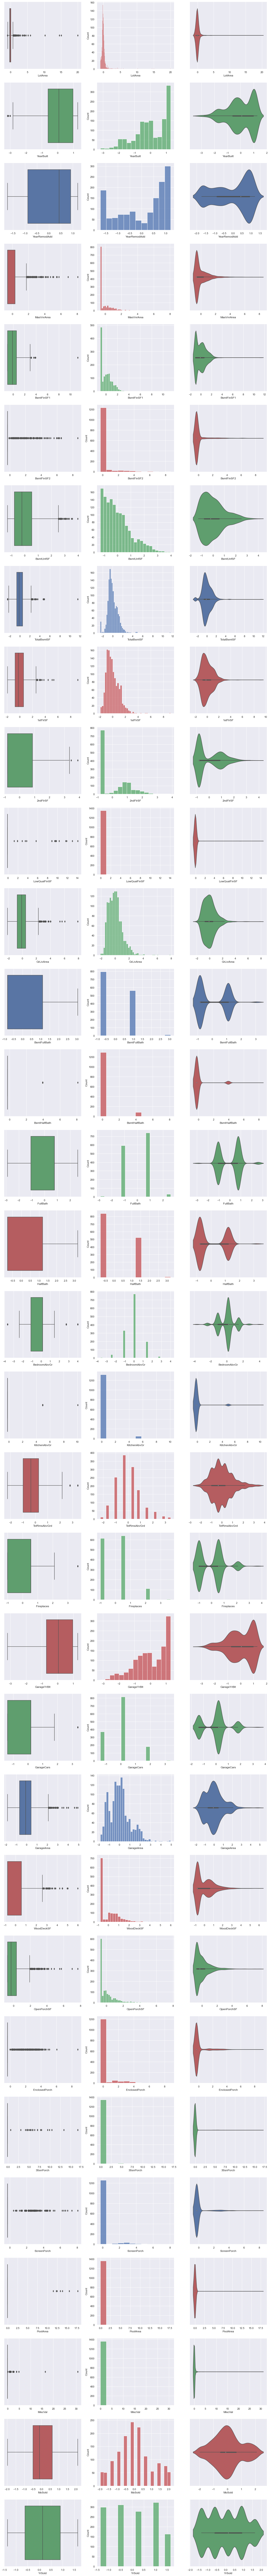

In [31]:
#investigating the skewness of data features (visually)
f, axes = plt.subplots(len(continuous), 3, figsize=(20, 200))
colors = ["r", "g", "b","r","g"]
colors = colors*7
count = 0
for i in continuous:
    sb.boxplot(x = features_stan[i], color = colors[count], ax = axes[count,0])
    sb.histplot(x = features_stan[i], color = colors[count], ax = axes[count,1])
    sb.violinplot(x = features_stan[i], color = colors[count], ax = axes[count,2])
    count += 1 

In [32]:
#calculating skewness of continuous variables
array = skew(features_stan[continuous])
#the top 10 features which are the most skewed
index = array.argsort()[-10:][::-1]
for i in index: 
    print (continuous[i],": skewness = ", array[i])

MiscVal : skewness =  24.73297945170622
PoolArea : skewness =  14.342881566938047
LotArea : skewness =  12.025446327344378
LowQualFinSF : skewness =  10.665053498583756
3SsnPorch : skewness =  9.962620463958894
KitchenAbvGr : skewness =  5.129053439295622
BsmtFinSF2 : skewness =  4.1743300055669375
ScreenPorch : skewness =  3.967379533802451
BsmtHalfBath : skewness =  3.8981191889499778
EnclosedPorch : skewness =  3.2148876131305855


## Feature Selection

Choosing variables that is correlated to SalePrice with absolute value more than 0.2

In [33]:
# variables most closely related to SalePrice
corr = train.corr()['SalePrice']
feature_select=[]
corrshape=corr.nlargest(corr.shape[0])[1:corr.shape[0]].shape[0]
for i in range(corrshape-1):
    if (abs(corr.nlargest(corrshape)[1:corrshape][i])>0.2):
        feature_select.append(corr.nlargest(corrshape)[1:corrshape].axes[0][i])
print(corr.nlargest(corrshape)[1:corrshape])
print(len(feature_select))

GrLivArea            0.709783
GarageCars           0.636173
GarageArea           0.607197
TotalBsmtSF          0.603284
1stFlrSF             0.596087
                       ...   
OverallQual_5       -0.383080
GarageType_Detchd   -0.406550
BsmtQual_TA         -0.456964
GarageFinish_Unf    -0.485273
KitchenQual_TA      -0.527689
Name: SalePrice, Length: 246, dtype: float64
68


In [34]:
features_fs1 = train[feature_select].copy()
labels_fs1 = train['SalePrice']
train_X_fs1, test_X_fs1, train_Y_fs1, test_Y_fs1 = train_test_split(features_fs1,labels_fs1,test_size=0.2, random_state=0)

In [35]:
# data normalization after feature selection 1
# fit scaler on training data
norm = MinMaxScaler().fit(features[feature_select])
# transform training data
features_fs1_norm = norm.transform(features[feature_select])

train_X_fs1_norm, test_X_fs1_norm, train_Y_fs1_norm, test_Y_fs1_norm = train_test_split(features_fs1_norm,labels_fs1,test_size=0.2, random_state=0)

In [36]:
# data standardization after feature selection 1
features_fs1_stan = features_stan[feature_select].copy()
train_X_fs1_stan, test_X_fs1_stan, train_Y_fs1_stan, test_Y_fs1_stan = train_test_split(features_fs1_stan,labels_fs1,test_size=0.2, random_state=0)

In [37]:
# variables most closely related to SalePrice after removing outliers via IQR
corr = train_out_2.corr()['SalePrice']
feature_select2=[]
corrshape=corr.nlargest(corr.shape[0])[1:corr.shape[0]].shape[0]
for i in range(corrshape-1):
    if (abs(corr.nlargest(corrshape)[1:corrshape][i])>0.2):
        feature_select2.append(corr.nlargest(corrshape)[1:corrshape].axes[0][i])
print(corr.nlargest(corrshape)[1:corrshape])
print(len(feature_select))

GrLivArea            0.760566
GarageCars           0.707453
GarageArea           0.681755
1stFlrSF             0.622325
TotRmsAbvGrd         0.600829
                       ...   
GarageType_Detchd   -0.451584
Foundation_CBlock   -0.454876
BsmtQual_TA         -0.521637
GarageFinish_Unf    -0.553690
KitchenQual_TA      -0.583410
Name: SalePrice, Length: 216, dtype: float64
68


In [38]:
features_fs2 = train_out_2[feature_select2].copy()
labels_fs2 = train_out_2['SalePrice']
train_X_fs2, test_X_fs2, train_Y_fs2, test_Y_fs2 = train_test_split(features_fs2,labels_fs2,test_size=0.2, random_state=0)

In [39]:
# data normalization after feature selection 2
# fit scaler on training data
norm = MinMaxScaler().fit(features_liqr[feature_select2])
# transform training data
features_fs2_norm = norm.transform(features_liqr[feature_select2])
train_X_fs2_norm, test_X_fs2_norm, train_Y_fs2_norm, test_Y_fs2_norm = train_test_split(features_fs2_norm,labels_fs2,test_size=0.2, random_state=0)

In [40]:
# data standardization after feature selection 2
features_stan=train_out_2.copy()
for i in continuous:
    # fit on training data column
    scale = StandardScaler().fit(train_out_2[[i]])
    # transform training data column
    features_stan[i] = scale.transform(features_stan[[i]])
features_fs2_stan=features_stan[feature_select2].copy()
train_X_fs2_stan, test_X_fs2_stan, train_Y_fs2_stan, test_Y_fs2_stan = train_test_split(features_fs2_stan,labels_fs2,test_size=0.2, random_state=0)